https://blog.faradars.org/face-detection-in-python/
http://deeptip.ir/face-recognition-in-python/


In [27]:

pip install cmake face_recognition

  Using cached face_recognition-1.3.0-py2.py3-none-any.whl (15 kB)
  Using cached dlib-19.22.0.tar.gz (7.4 MB)
Processing c:\users\it\appdata\local\pip\cache\wheels\b4\4b\8f\751e99d45f089bdf366a7d3e5066db3c2b84a62e4377f534d7\face_recognition_models-0.3.0-py2.py3-none-any.whl
  Running setup.py clean for dlib
Failed to build dlib
    Running setup.py install for dlib: started
    Running setup.py install for dlib: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\IT\anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\IT\\AppData\\Local\\Temp\\pip-install-jj99sx6s\\dlib\\setup.py'"'"'; __file__='"'"'C:\\Users\\IT\\AppData\\Local\\Temp\\pip-install-jj99sx6s\\dlib\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\IT\AppData\Local\Temp\pip-wheel-7m3yvp2s'
       cwd: C:\Users\IT\AppData\Local\Temp\pip-install-jj99sx6s\dlib\
  Complete output (58 lines):
  running bdist_wheel
  running build
  running build_py
  package init file 'tools\python\dlib\__init__.py' not found (or not a regular file)
  running build_ext
  Building extension for Python 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
  Invoking CMake setup: 'cmake C:\Users\IT\AppData\Local\Temp\pip-install-jj99sx6

In [28]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import sys


In [29]:
img=cv2.imread("images/faces2.jpg")
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#plt.imshow(img)


In [30]:
faceCascade=cv2.CascadeClassifier("images/haarcascade_frontalface_default.xml")

In [31]:
# Detect faces in the image
faces = faceCascade.detectMultiScale(
    gray,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(5, 5)
    #flags = cv2.CV_HAAR_SCALE_IMAGE
)

تابع بالا لیستی از مستطیل هارو که به نظر میرسه چهره باشه برمیگردونه ، بعدش یه حلقه از این مستطیل ها ایجاد خواهیم کرد

Found  faces! 70


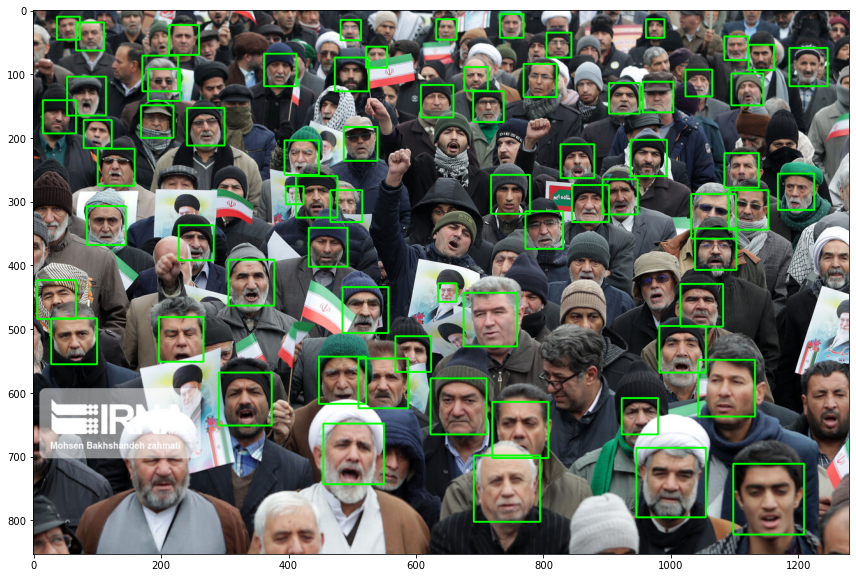

In [6]:
print ('Found  faces!',len(faces))
# Draw a rectangle around the faces
copy=img.copy()
for (x, y, w, h) in faces:
    cv2.rectangle(copy, (x, y), (x+w, y+h), (0, 255, 0), 2)
plt.figure(figsize=(15,10))
plt.imshow(copy )

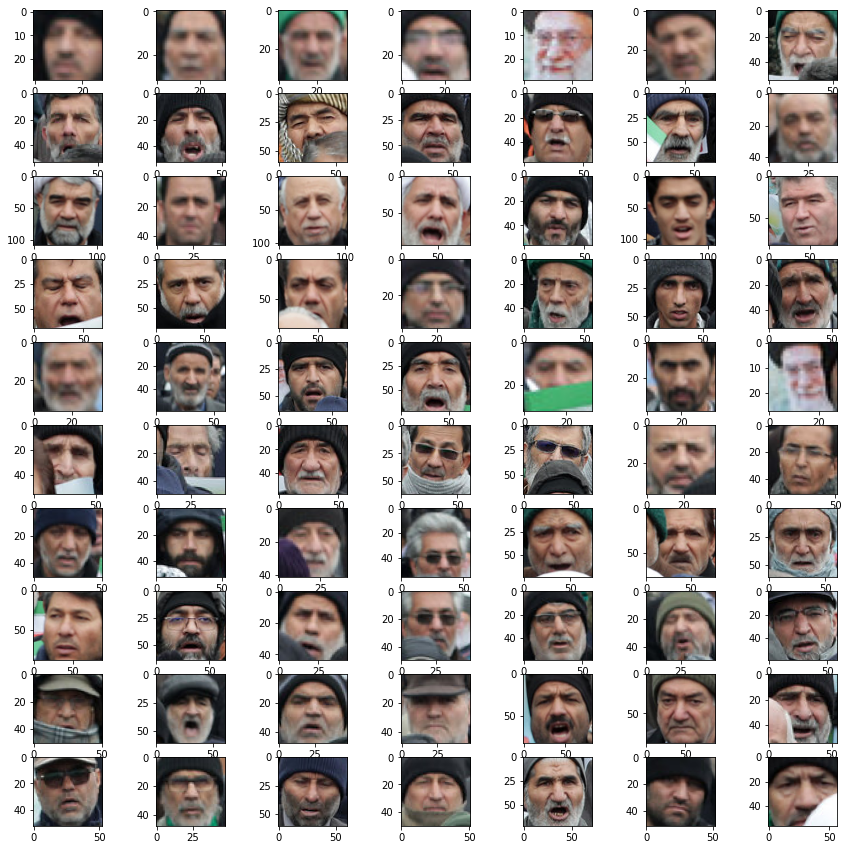

In [7]:
#print(faces)
i=1
plt.figure(figsize=(15,15))
for (x, y, w, h) in faces:
    plt.subplot(10,7,i)
    i=i+1
    plt.imshow(img[y:y+h,x:x+w])
    

In [8]:
#print(faces)

In [9]:

faceCascade = cv2.CascadeClassifier("images/haarcascade_frontalface_default.xml")
eyeCascade = cv2.CascadeClassifier('images/haarcascade_eye.xml')
smileCascade = cv2.CascadeClassifier('images/haarcascade_smile.xml')

In [26]:
video_capture = cv2.VideoCapture(0)
while True:
    # Capture frame-by-frame
    ret, frame = video_capture.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(30, 30),
        flags=cv2.CASCADE_SCALE_IMAGE
        )
    # Draw a rectangle around the faces
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 3)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
    smile = smileCascade.detectMultiScale(
        roi_gray,
        scaleFactor= 1.16,
        minNeighbors=35,
        minSize=(25, 25),
        flags=cv2.CASCADE_SCALE_IMAGE
    )
    for (sx, sy, sw, sh) in smile:
        cv2.rectangle(roi_color, (sh, sy), (sx+sw, sy+sh), (255, 0, 0), 2)
        cv2.putText(frame,'Smile',(x + sx,y + sy), 1, 1, (0, 255, 0), 1)
    
    eyes = eyeCascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        cv2.putText(frame,'Eye',(x + ex,y + ey), 1, 1, (0, 255, 0), 1)
        
    
 
         
    # Display the resulting frame
    cv2.imshow('Video', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

In [24]:
video_capture.release()